## 5. Association Between Features

### Step 1: Import Libraries and Load Data

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (replace 'dataset.csv' with your file path)
df = pd.read_csv('Google-Playstore-Preprocessed.csv')

# Display dataset overview
print("Dataset Overview:")
print(df.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248021 entries, 0 to 1248020
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1248021 non-null  int64  
 1   App Name          1248021 non-null  object 
 2   App Id            1248021 non-null  object 
 3   Category          1248021 non-null  object 
 4   Rating            1248021 non-null  float64
 5   Rating Count      1248021 non-null  float64
 6   Minimum Installs  1248021 non-null  float64
 7   Maximum Installs  1248021 non-null  int64  
 8   Free              1248021 non-null  bool   
 9   Price             1248021 non-null  float64
 10  Currency          1248021 non-null  object 
 11  Size              1248021 non-null  float64
 12  Minimum Android   1248021 non-null  object 
 13  Released          1248021 non-null  object 
 14  Last Updated      1248021 non-null  object 
 15  Content Rating    1248021 non-n

### Step 2: Data Preprocessing

In [8]:
# Select Relevant Columns and Handle Missing Values

# Select numerical columns for correlation analysis
columns_of_interest = ['Rating', 'Size', 'Price', 'Minimum Installs', 'Maximum Installs']
df_subset = df[columns_of_interest]

# Handle missing values
df_subset['Size'] = pd.to_numeric(df_subset['Size'], errors='coerce')  # Convert size to numeric
df_subset['Price'] = pd.to_numeric(df_subset['Price'], errors='coerce')  # Convert price to numeric
df_subset = df_subset.dropna()  # Drop rows with missing values
df_subset['Price'] = df_subset['Price'].fillna(0)  # Replace missing price with 0
df_subset['Size'] = df_subset['Size'].fillna(df_subset['Size'].mean())  # Replace missing size with mean


C:\Users\Valmik Belgaonkar\AppData\Local\Temp\ipykernel_22452\1029960817.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Size'] = pd.to_numeric(df_subset['Size'], errors='coerce')  # Convert size to numeric
C:\Users\Valmik Belgaonkar\AppData\Local\Temp\ipykernel_22452\1029960817.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Price'] = pd.to_numeric(df_subset['Price'], errors='coerce')  # Convert price to numeric


### Step 3: Visualize Correlations Using Heatmap

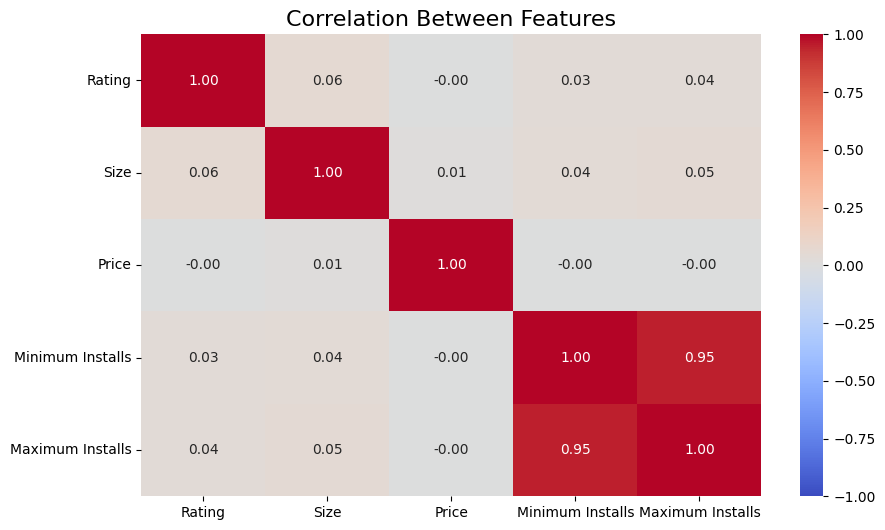

Strong correlations (> 0.7 or < -0.7):
                   Rating  Size  Price  Minimum Installs  Maximum Installs
Rating               1.0   NaN    NaN               NaN               NaN
Size                 NaN   1.0    NaN               NaN               NaN
Price                NaN   NaN    1.0               NaN               NaN
Minimum Installs     NaN   NaN    NaN          1.000000          0.947769
Maximum Installs     NaN   NaN    NaN          0.947769          1.000000


In [9]:
# Compute correlation matrix
correlation_matrix = df_subset.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Between Features', fontsize=16)
plt.show()

# Highlight strong correlations
strong_correlations = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
print("Strong correlations (> 0.7 or < -0.7):\n", strong_correlations)


### Step 4: Feedback Loop with User Interaction

In [10]:
# Suggest Feature Engineering Based on Correlations

print("\nFeedback Options:")
print("1. Create a new feature: Price per Install.")
print("2. Filter data by specific criteria (e.g., apps with ratings above 4.0).")
print("3. Remove highly correlated features and reanalyze.")
print("4. Proceed without changes.")

# User input
choice = int(input("Enter your choice (1, 2, 3, or 4): "))

if choice == 1:
    # Create a new feature: Price per Install
    df_subset['Price per Install'] = df_subset['Price'] / df_subset['Maximum Installs']
    df_subset['Price per Install'].replace([np.inf, -np.inf], 0, inplace=True)  # Handle division by zero
    print("Feature 'Price per Install' added. Recalculating correlations...")
elif choice == 2:
    # Filter data based on criteria
    df_subset = df_subset[df_subset['Rating'] > 4.0]
    print("Filtered data for apps with ratings above 4.0. Recalculating correlations...")
elif choice == 3:
    # Remove one of each pair of highly correlated features
    high_corr_pairs = [
        (i, j) for i in correlation_matrix.columns for j in correlation_matrix.columns
        if (i != j) and abs(correlation_matrix.loc[i, j]) > 0.7
    ]
    for i, j in high_corr_pairs:
        if i in df_subset.columns:
            df_subset = df_subset.drop(columns=[i])
            print(f"Removed highly correlated feature: {i}")
            break
elif choice == 4:
    print("Proceeding without changes.")
else:
    print("Invalid choice. Proceeding without changes.")



Feedback Options:
1. Create a new feature: Price per Install.
2. Filter data by specific criteria (e.g., apps with ratings above 4.0).
3. Remove highly correlated features and reanalyze.
4. Proceed without changes.
Removed highly correlated feature: Minimum Installs


### Step 5: Recalculate and Visualize Updated Correlations

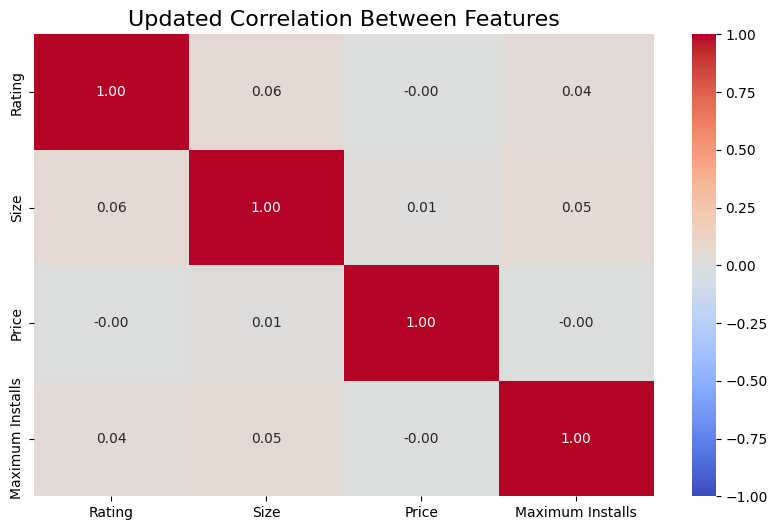

Updated Strong correlations (> 0.7 or < -0.7):
                   Rating  Size  Price  Maximum Installs
Rating               1.0   NaN    NaN               NaN
Size                 NaN   1.0    NaN               NaN
Price                NaN   NaN    1.0               NaN
Maximum Installs     NaN   NaN    NaN               1.0


In [11]:
# Recompute correlation matrix
updated_correlation_matrix = df_subset.corr()

# Plot updated heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(updated_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Updated Correlation Between Features', fontsize=16)
plt.show()

# Highlight strong correlations in the updated matrix
updated_strong_correlations = updated_correlation_matrix[(updated_correlation_matrix > 0.7) | (updated_correlation_matrix < -0.7)]
print("Updated Strong correlations (> 0.7 or < -0.7):\n", updated_strong_correlations)
